In [1]:
# Import packages
%reset -f
from helpers import load_all_data, vectorized_flatten, sigmoid, get_log_loss, get_accuracy , shuffle_data
from helpers import sigmoid_derivative, gradient_update, plot_loss, prep_data
import numpy as np
import cv2

In [2]:
def train_perceptron(X, Y, X_dev, y_dev, epochs, lr):
    '''
    --------------------
    Perceptron algorithm
    --------------------
    Parameters: 
    X: Numpy array of training features (shape = 784 X n)
    y: Binary (1/-1) training label (shape = n X 1)
    --------------------
    Output: 
    w: trained weights
    b: trained biases
    y_preds: predictions 
    --------------------
    '''
    # Initialize weights and biases
    w = np.zeros(X.shape[0])
    b = 0
    
    # History goes here
    history = {
        "weights": [w],
        "losses": [], 
        "biases": [b],
        "accuracies": [],
        "dev_accuracies": []
    }
    
    # Best accuracy
    best_accuracy = 0
    
    # Run for a fixed number of epochs
    for epoch in range(epochs):
        
        X, Y = shuffle_data(X, Y)
        
        # Do this for each example in the dataset
        for i in range(X.shape[1]):

            # Store the sample data
            x_i = X[:, i]
            y_i = Y[0][i]
            
            # Compute the prediction with the current weights
            if (np.dot(w, x_i) + b > 0): y_hat = 1
            else: y_hat = -1
            
            # Check if the prediction is correct against the labels
            # If it is correct we don't need to make any updates: we just move to the next iteration
            # If it is not correct then we do the following: 
            # 1) Update the weights and biases in the direction of the label
            if y_hat != y_i:
                w += lr*(y_i - y_hat)*x_i
                b += lr*(y_i - y_hat)
            
            
        # Get predictions on train and test
        y_train_preds = np.array([int(np.dot(w, X[:, i]) + b  > 0) for i in range(X.shape[1])])
        y_dev_preds = np.array([int(np.dot(w, X_dev[:, i]) + b  > 0) for i in range(X_dev.shape[1])])
        
        # Training accuracy                       
        accuracy = get_accuracy(Y, y_train_preds)
        dev_accuracy = get_accuracy(y_dev, y_dev_preds)
        print("Epoch {}/{}: Training_accuracy = {}, Dev. Accuracy = {}".format(epoch, epochs, accuracy, dev_accuracy))
         
        # Append results to history
        history["biases"].append(b)
        history["weights"].append(w)
        history["accuracies"].append(accuracy)
        history["dev_accuracies"].append(dev_accuracy)
        
        # Get training accuracy
        print("Epoch {}/{}: Training_accuracy = {}".format(epoch, epochs, accuracy))
    
    # Return statement
    return(history)

In [3]:
def get_perceptron_baseline(data_path, epochs, lr):
    '''
    --------------------
    Run perceptron algorithm to get a base-line
    --------------------
    Parameters: 
    X: Numpy array of training features (shape = 784 X n)
    y: Binary (1/0) training label (shape = n X 1)
    --------------------
    Output: 
    w: trained weights
    y_preds: predictions
    --------------------
    '''
    # Set the random seed for np.random number generator
    # This will make sure results are reproducible
    np.random.seed(132089)
    
    # Prepare data for the perceptron
    X_train_flattened, X_dev_flattened, X_test_flattened, y_train, y_dev, y_test = prep_data(data_path)
    
    # Call the perceptron training with the given epochs
    history = train_perceptron(X_train_flattened, y_train, X_dev_flattened, y_dev, epochs, lr)
    
    # Get results from history
    best_epoch, best_training_accuracy, best_dev_accuracy = get_results(history)
    
    # Plot accuracies
    plot_loss("../figs/perceptron_training_accuracy.png", history["accuracies"][:-2], 
              label='Training Accuracy')
    plot_loss("../figs/perceptron_dev_accuracy.png", history["dev_accuracies"][:-2], 
              label = "Dev. Accuracy")
    
    # Return statement
    return(best_epoch, best_training_accuracy, best_dev_accuracy, history)

In [4]:
def get_results(history):
    '''
    --------------------
    Prepare data
    --------------------
    Parameters: 
    weights: Current set of weights
    biases: Current set of biases
    gradients: Current set of gradients
    learning_rate: parameter to guide SGD step size
    --------------------
    Output: 
    Updated weights and biases
    --------------------
    '''
    # Store results
    best_epoch = np.array(history["dev_accuracies"]).argmax()
    best_training_accuracy = history['accuracies'][best_epoch]
    best_dev_accuracy = history['dev_accuracies'][best_epoch]
    
    # Display results
    print(f"best training accuracy: {history['accuracies'][best_epoch]}")
    print(f"best dev accuracy: {history['dev_accuracies'][best_epoch]}")
    print(f"best epoch: {best_epoch}")
    
    return(best_epoch, best_training_accuracy, best_dev_accuracy)

Epoch 0/1000: Training_accuracy = 0.7280833333333333, Dev. Accuracy = 0.743
Epoch 0/1000: Training_accuracy = 0.7280833333333333
Epoch 1/1000: Training_accuracy = 0.5034166666666666, Dev. Accuracy = 0.51
Epoch 1/1000: Training_accuracy = 0.5034166666666666
Epoch 2/1000: Training_accuracy = 0.6209166666666667, Dev. Accuracy = 0.635
Epoch 2/1000: Training_accuracy = 0.6209166666666667
Epoch 3/1000: Training_accuracy = 0.8024166666666667, Dev. Accuracy = 0.813
Epoch 3/1000: Training_accuracy = 0.8024166666666667
Epoch 4/1000: Training_accuracy = 0.7986666666666666, Dev. Accuracy = 0.804
Epoch 4/1000: Training_accuracy = 0.7986666666666666
Epoch 5/1000: Training_accuracy = 0.5193333333333333, Dev. Accuracy = 0.524
Epoch 5/1000: Training_accuracy = 0.5193333333333333
Epoch 6/1000: Training_accuracy = 0.5695, Dev. Accuracy = 0.581
Epoch 6/1000: Training_accuracy = 0.5695
Epoch 7/1000: Training_accuracy = 0.7018333333333333, Dev. Accuracy = 0.701
Epoch 7/1000: Training_accuracy = 0.7018333333

Epoch 67/1000: Training_accuracy = 0.8615833333333334, Dev. Accuracy = 0.866
Epoch 67/1000: Training_accuracy = 0.8615833333333334
Epoch 68/1000: Training_accuracy = 0.8644166666666667, Dev. Accuracy = 0.861
Epoch 68/1000: Training_accuracy = 0.8644166666666667
Epoch 69/1000: Training_accuracy = 0.6398333333333334, Dev. Accuracy = 0.653
Epoch 69/1000: Training_accuracy = 0.6398333333333334
Epoch 70/1000: Training_accuracy = 0.8550833333333333, Dev. Accuracy = 0.853
Epoch 70/1000: Training_accuracy = 0.8550833333333333
Epoch 71/1000: Training_accuracy = 0.9345, Dev. Accuracy = 0.937
Epoch 71/1000: Training_accuracy = 0.9345
Epoch 72/1000: Training_accuracy = 0.77225, Dev. Accuracy = 0.79
Epoch 72/1000: Training_accuracy = 0.77225
Epoch 73/1000: Training_accuracy = 0.8996666666666666, Dev. Accuracy = 0.878
Epoch 73/1000: Training_accuracy = 0.8996666666666666
Epoch 74/1000: Training_accuracy = 0.8823333333333333, Dev. Accuracy = 0.896
Epoch 74/1000: Training_accuracy = 0.8823333333333333

Epoch 134/1000: Training_accuracy = 0.8624166666666667, Dev. Accuracy = 0.858
Epoch 134/1000: Training_accuracy = 0.8624166666666667
Epoch 135/1000: Training_accuracy = 0.65375, Dev. Accuracy = 0.664
Epoch 135/1000: Training_accuracy = 0.65375
Epoch 136/1000: Training_accuracy = 0.67225, Dev. Accuracy = 0.689
Epoch 136/1000: Training_accuracy = 0.67225
Epoch 137/1000: Training_accuracy = 0.5289166666666667, Dev. Accuracy = 0.542
Epoch 137/1000: Training_accuracy = 0.5289166666666667
Epoch 138/1000: Training_accuracy = 0.8759166666666667, Dev. Accuracy = 0.88
Epoch 138/1000: Training_accuracy = 0.8759166666666667
Epoch 139/1000: Training_accuracy = 0.66475, Dev. Accuracy = 0.678
Epoch 139/1000: Training_accuracy = 0.66475
Epoch 140/1000: Training_accuracy = 0.5348333333333334, Dev. Accuracy = 0.551
Epoch 140/1000: Training_accuracy = 0.5348333333333334
Epoch 141/1000: Training_accuracy = 0.9119166666666667, Dev. Accuracy = 0.906
Epoch 141/1000: Training_accuracy = 0.9119166666666667
Epo

Epoch 199/1000: Training_accuracy = 0.5608333333333333, Dev. Accuracy = 0.567
Epoch 199/1000: Training_accuracy = 0.5608333333333333
Epoch 200/1000: Training_accuracy = 0.88125, Dev. Accuracy = 0.887
Epoch 200/1000: Training_accuracy = 0.88125
Epoch 201/1000: Training_accuracy = 0.7785833333333333, Dev. Accuracy = 0.777
Epoch 201/1000: Training_accuracy = 0.7785833333333333
Epoch 202/1000: Training_accuracy = 0.60375, Dev. Accuracy = 0.616
Epoch 202/1000: Training_accuracy = 0.60375
Epoch 203/1000: Training_accuracy = 0.59025, Dev. Accuracy = 0.609
Epoch 203/1000: Training_accuracy = 0.59025
Epoch 204/1000: Training_accuracy = 0.8638333333333333, Dev. Accuracy = 0.845
Epoch 204/1000: Training_accuracy = 0.8638333333333333
Epoch 205/1000: Training_accuracy = 0.5965833333333334, Dev. Accuracy = 0.613
Epoch 205/1000: Training_accuracy = 0.5965833333333334
Epoch 206/1000: Training_accuracy = 0.8973333333333333, Dev. Accuracy = 0.892
Epoch 206/1000: Training_accuracy = 0.8973333333333333
Ep

Epoch 265/1000: Training_accuracy = 0.9045833333333333, Dev. Accuracy = 0.901
Epoch 265/1000: Training_accuracy = 0.9045833333333333
Epoch 266/1000: Training_accuracy = 0.9286666666666666, Dev. Accuracy = 0.914
Epoch 266/1000: Training_accuracy = 0.9286666666666666
Epoch 267/1000: Training_accuracy = 0.7494166666666666, Dev. Accuracy = 0.748
Epoch 267/1000: Training_accuracy = 0.7494166666666666
Epoch 268/1000: Training_accuracy = 0.856, Dev. Accuracy = 0.86
Epoch 268/1000: Training_accuracy = 0.856
Epoch 269/1000: Training_accuracy = 0.58175, Dev. Accuracy = 0.594
Epoch 269/1000: Training_accuracy = 0.58175
Epoch 270/1000: Training_accuracy = 0.5119166666666667, Dev. Accuracy = 0.519
Epoch 270/1000: Training_accuracy = 0.5119166666666667
Epoch 271/1000: Training_accuracy = 0.6583333333333333, Dev. Accuracy = 0.66
Epoch 271/1000: Training_accuracy = 0.6583333333333333
Epoch 272/1000: Training_accuracy = 0.821, Dev. Accuracy = 0.834
Epoch 272/1000: Training_accuracy = 0.821
Epoch 273/10

Epoch 330/1000: Training_accuracy = 0.7910833333333334, Dev. Accuracy = 0.801
Epoch 330/1000: Training_accuracy = 0.7910833333333334
Epoch 331/1000: Training_accuracy = 0.8359166666666666, Dev. Accuracy = 0.835
Epoch 331/1000: Training_accuracy = 0.8359166666666666
Epoch 332/1000: Training_accuracy = 0.9375, Dev. Accuracy = 0.936
Epoch 332/1000: Training_accuracy = 0.9375
Epoch 333/1000: Training_accuracy = 0.5700833333333334, Dev. Accuracy = 0.569
Epoch 333/1000: Training_accuracy = 0.5700833333333334
Epoch 334/1000: Training_accuracy = 0.9313333333333333, Dev. Accuracy = 0.925
Epoch 334/1000: Training_accuracy = 0.9313333333333333
Epoch 335/1000: Training_accuracy = 0.8601666666666666, Dev. Accuracy = 0.861
Epoch 335/1000: Training_accuracy = 0.8601666666666666
Epoch 336/1000: Training_accuracy = 0.5614166666666667, Dev. Accuracy = 0.567
Epoch 336/1000: Training_accuracy = 0.5614166666666667
Epoch 337/1000: Training_accuracy = 0.91025, Dev. Accuracy = 0.908
Epoch 337/1000: Training_a

Epoch 395/1000: Training_accuracy = 0.7416666666666667, Dev. Accuracy = 0.75
Epoch 395/1000: Training_accuracy = 0.7416666666666667
Epoch 396/1000: Training_accuracy = 0.8099166666666666, Dev. Accuracy = 0.81
Epoch 396/1000: Training_accuracy = 0.8099166666666666
Epoch 397/1000: Training_accuracy = 0.6468333333333334, Dev. Accuracy = 0.644
Epoch 397/1000: Training_accuracy = 0.6468333333333334
Epoch 398/1000: Training_accuracy = 0.6401666666666667, Dev. Accuracy = 0.648
Epoch 398/1000: Training_accuracy = 0.6401666666666667
Epoch 399/1000: Training_accuracy = 0.6538333333333334, Dev. Accuracy = 0.665
Epoch 399/1000: Training_accuracy = 0.6538333333333334
Epoch 400/1000: Training_accuracy = 0.9055833333333333, Dev. Accuracy = 0.904
Epoch 400/1000: Training_accuracy = 0.9055833333333333
Epoch 401/1000: Training_accuracy = 0.5355833333333333, Dev. Accuracy = 0.542
Epoch 401/1000: Training_accuracy = 0.5355833333333333
Epoch 402/1000: Training_accuracy = 0.9088333333333334, Dev. Accuracy =

Epoch 460/1000: Training_accuracy = 0.5200833333333333, Dev. Accuracy = 0.531
Epoch 460/1000: Training_accuracy = 0.5200833333333333
Epoch 461/1000: Training_accuracy = 0.8104166666666667, Dev. Accuracy = 0.814
Epoch 461/1000: Training_accuracy = 0.8104166666666667
Epoch 462/1000: Training_accuracy = 0.5180833333333333, Dev. Accuracy = 0.526
Epoch 462/1000: Training_accuracy = 0.5180833333333333
Epoch 463/1000: Training_accuracy = 0.9049166666666667, Dev. Accuracy = 0.895
Epoch 463/1000: Training_accuracy = 0.9049166666666667
Epoch 464/1000: Training_accuracy = 0.5630833333333334, Dev. Accuracy = 0.581
Epoch 464/1000: Training_accuracy = 0.5630833333333334
Epoch 465/1000: Training_accuracy = 0.5620833333333334, Dev. Accuracy = 0.561
Epoch 465/1000: Training_accuracy = 0.5620833333333334
Epoch 466/1000: Training_accuracy = 0.9389166666666666, Dev. Accuracy = 0.934
Epoch 466/1000: Training_accuracy = 0.9389166666666666
Epoch 467/1000: Training_accuracy = 0.9248333333333333, Dev. Accuracy

Epoch 526/1000: Training_accuracy = 0.6971666666666667, Dev. Accuracy = 0.711
Epoch 526/1000: Training_accuracy = 0.6971666666666667
Epoch 527/1000: Training_accuracy = 0.5419166666666667, Dev. Accuracy = 0.552
Epoch 527/1000: Training_accuracy = 0.5419166666666667
Epoch 528/1000: Training_accuracy = 0.8144166666666667, Dev. Accuracy = 0.814
Epoch 528/1000: Training_accuracy = 0.8144166666666667
Epoch 529/1000: Training_accuracy = 0.8895, Dev. Accuracy = 0.891
Epoch 529/1000: Training_accuracy = 0.8895
Epoch 530/1000: Training_accuracy = 0.7755833333333333, Dev. Accuracy = 0.779
Epoch 530/1000: Training_accuracy = 0.7755833333333333
Epoch 531/1000: Training_accuracy = 0.5979166666666667, Dev. Accuracy = 0.589
Epoch 531/1000: Training_accuracy = 0.5979166666666667
Epoch 532/1000: Training_accuracy = 0.9175833333333333, Dev. Accuracy = 0.917
Epoch 532/1000: Training_accuracy = 0.9175833333333333
Epoch 533/1000: Training_accuracy = 0.73425, Dev. Accuracy = 0.74
Epoch 533/1000: Training_ac

Epoch 591/1000: Training_accuracy = 0.908, Dev. Accuracy = 0.911
Epoch 591/1000: Training_accuracy = 0.908
Epoch 592/1000: Training_accuracy = 0.6066666666666667, Dev. Accuracy = 0.608
Epoch 592/1000: Training_accuracy = 0.6066666666666667
Epoch 593/1000: Training_accuracy = 0.5219166666666667, Dev. Accuracy = 0.534
Epoch 593/1000: Training_accuracy = 0.5219166666666667
Epoch 594/1000: Training_accuracy = 0.6913333333333334, Dev. Accuracy = 0.705
Epoch 594/1000: Training_accuracy = 0.6913333333333334
Epoch 595/1000: Training_accuracy = 0.8965833333333333, Dev. Accuracy = 0.904
Epoch 595/1000: Training_accuracy = 0.8965833333333333
Epoch 596/1000: Training_accuracy = 0.8126666666666666, Dev. Accuracy = 0.807
Epoch 596/1000: Training_accuracy = 0.8126666666666666
Epoch 597/1000: Training_accuracy = 0.53525, Dev. Accuracy = 0.546
Epoch 597/1000: Training_accuracy = 0.53525
Epoch 598/1000: Training_accuracy = 0.5751666666666667, Dev. Accuracy = 0.589
Epoch 598/1000: Training_accuracy = 0.5

Epoch 655/1000: Training_accuracy = 0.56125, Dev. Accuracy = 0.568
Epoch 655/1000: Training_accuracy = 0.56125
Epoch 656/1000: Training_accuracy = 0.75025, Dev. Accuracy = 0.756
Epoch 656/1000: Training_accuracy = 0.75025
Epoch 657/1000: Training_accuracy = 0.839, Dev. Accuracy = 0.847
Epoch 657/1000: Training_accuracy = 0.839
Epoch 658/1000: Training_accuracy = 0.5478333333333333, Dev. Accuracy = 0.557
Epoch 658/1000: Training_accuracy = 0.5478333333333333
Epoch 659/1000: Training_accuracy = 0.528, Dev. Accuracy = 0.546
Epoch 659/1000: Training_accuracy = 0.528
Epoch 660/1000: Training_accuracy = 0.932, Dev. Accuracy = 0.94
Epoch 660/1000: Training_accuracy = 0.932
Epoch 661/1000: Training_accuracy = 0.887, Dev. Accuracy = 0.901
Epoch 661/1000: Training_accuracy = 0.887
Epoch 662/1000: Training_accuracy = 0.8053333333333333, Dev. Accuracy = 0.802
Epoch 662/1000: Training_accuracy = 0.8053333333333333
Epoch 663/1000: Training_accuracy = 0.5720833333333334, Dev. Accuracy = 0.588
Epoch 6

Epoch 722/1000: Training_accuracy = 0.9201666666666667, Dev. Accuracy = 0.922
Epoch 722/1000: Training_accuracy = 0.9201666666666667
Epoch 723/1000: Training_accuracy = 0.5156666666666667, Dev. Accuracy = 0.526
Epoch 723/1000: Training_accuracy = 0.5156666666666667
Epoch 724/1000: Training_accuracy = 0.9243333333333333, Dev. Accuracy = 0.93
Epoch 724/1000: Training_accuracy = 0.9243333333333333
Epoch 725/1000: Training_accuracy = 0.9104166666666667, Dev. Accuracy = 0.905
Epoch 725/1000: Training_accuracy = 0.9104166666666667
Epoch 726/1000: Training_accuracy = 0.867, Dev. Accuracy = 0.86
Epoch 726/1000: Training_accuracy = 0.867
Epoch 727/1000: Training_accuracy = 0.8205833333333333, Dev. Accuracy = 0.816
Epoch 727/1000: Training_accuracy = 0.8205833333333333
Epoch 728/1000: Training_accuracy = 0.8796666666666667, Dev. Accuracy = 0.878
Epoch 728/1000: Training_accuracy = 0.8796666666666667
Epoch 729/1000: Training_accuracy = 0.56125, Dev. Accuracy = 0.581
Epoch 729/1000: Training_accur

Epoch 788/1000: Training_accuracy = 0.554, Dev. Accuracy = 0.569
Epoch 788/1000: Training_accuracy = 0.554
Epoch 789/1000: Training_accuracy = 0.5530833333333334, Dev. Accuracy = 0.553
Epoch 789/1000: Training_accuracy = 0.5530833333333334
Epoch 790/1000: Training_accuracy = 0.5165833333333333, Dev. Accuracy = 0.524
Epoch 790/1000: Training_accuracy = 0.5165833333333333
Epoch 791/1000: Training_accuracy = 0.7008333333333333, Dev. Accuracy = 0.703
Epoch 791/1000: Training_accuracy = 0.7008333333333333
Epoch 792/1000: Training_accuracy = 0.5560833333333334, Dev. Accuracy = 0.571
Epoch 792/1000: Training_accuracy = 0.5560833333333334
Epoch 793/1000: Training_accuracy = 0.8851666666666667, Dev. Accuracy = 0.89
Epoch 793/1000: Training_accuracy = 0.8851666666666667
Epoch 794/1000: Training_accuracy = 0.62025, Dev. Accuracy = 0.624
Epoch 794/1000: Training_accuracy = 0.62025
Epoch 795/1000: Training_accuracy = 0.907, Dev. Accuracy = 0.896
Epoch 795/1000: Training_accuracy = 0.907
Epoch 796/1

Epoch 854/1000: Training_accuracy = 0.6771666666666667, Dev. Accuracy = 0.679
Epoch 854/1000: Training_accuracy = 0.6771666666666667
Epoch 855/1000: Training_accuracy = 0.5944166666666667, Dev. Accuracy = 0.597
Epoch 855/1000: Training_accuracy = 0.5944166666666667
Epoch 856/1000: Training_accuracy = 0.8756666666666667, Dev. Accuracy = 0.87
Epoch 856/1000: Training_accuracy = 0.8756666666666667
Epoch 857/1000: Training_accuracy = 0.83975, Dev. Accuracy = 0.851
Epoch 857/1000: Training_accuracy = 0.83975
Epoch 858/1000: Training_accuracy = 0.8844166666666666, Dev. Accuracy = 0.879
Epoch 858/1000: Training_accuracy = 0.8844166666666666
Epoch 859/1000: Training_accuracy = 0.5458333333333333, Dev. Accuracy = 0.548
Epoch 859/1000: Training_accuracy = 0.5458333333333333
Epoch 860/1000: Training_accuracy = 0.8506666666666667, Dev. Accuracy = 0.841
Epoch 860/1000: Training_accuracy = 0.8506666666666667
Epoch 861/1000: Training_accuracy = 0.63675, Dev. Accuracy = 0.637
Epoch 861/1000: Training_

Epoch 920/1000: Training_accuracy = 0.59525, Dev. Accuracy = 0.59
Epoch 920/1000: Training_accuracy = 0.59525
Epoch 921/1000: Training_accuracy = 0.661, Dev. Accuracy = 0.66
Epoch 921/1000: Training_accuracy = 0.661
Epoch 922/1000: Training_accuracy = 0.7798333333333334, Dev. Accuracy = 0.777
Epoch 922/1000: Training_accuracy = 0.7798333333333334
Epoch 923/1000: Training_accuracy = 0.90175, Dev. Accuracy = 0.902
Epoch 923/1000: Training_accuracy = 0.90175
Epoch 924/1000: Training_accuracy = 0.5076666666666667, Dev. Accuracy = 0.519
Epoch 924/1000: Training_accuracy = 0.5076666666666667
Epoch 925/1000: Training_accuracy = 0.599, Dev. Accuracy = 0.62
Epoch 925/1000: Training_accuracy = 0.599
Epoch 926/1000: Training_accuracy = 0.631, Dev. Accuracy = 0.636
Epoch 926/1000: Training_accuracy = 0.631
Epoch 927/1000: Training_accuracy = 0.521, Dev. Accuracy = 0.529
Epoch 927/1000: Training_accuracy = 0.521
Epoch 928/1000: Training_accuracy = 0.5250833333333333, Dev. Accuracy = 0.529
Epoch 928

Epoch 987/1000: Training_accuracy = 0.8743333333333333, Dev. Accuracy = 0.863
Epoch 987/1000: Training_accuracy = 0.8743333333333333
Epoch 988/1000: Training_accuracy = 0.8665833333333334, Dev. Accuracy = 0.868
Epoch 988/1000: Training_accuracy = 0.8665833333333334
Epoch 989/1000: Training_accuracy = 0.6138333333333333, Dev. Accuracy = 0.63
Epoch 989/1000: Training_accuracy = 0.6138333333333333
Epoch 990/1000: Training_accuracy = 0.8599166666666667, Dev. Accuracy = 0.867
Epoch 990/1000: Training_accuracy = 0.8599166666666667
Epoch 991/1000: Training_accuracy = 0.6835833333333333, Dev. Accuracy = 0.699
Epoch 991/1000: Training_accuracy = 0.6835833333333333
Epoch 992/1000: Training_accuracy = 0.9231666666666667, Dev. Accuracy = 0.92
Epoch 992/1000: Training_accuracy = 0.9231666666666667
Epoch 993/1000: Training_accuracy = 0.8216666666666667, Dev. Accuracy = 0.82
Epoch 993/1000: Training_accuracy = 0.8216666666666667
Epoch 994/1000: Training_accuracy = 0.8023333333333333, Dev. Accuracy = 

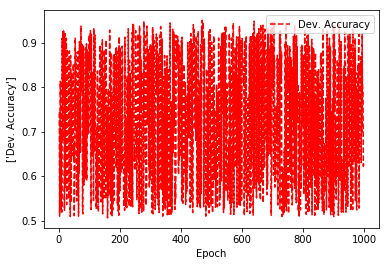

In [5]:
# Set parameters
data_path = '../setup/data'
epochs = 1000
lr = 0.6

# Call training function
best_epoch, best_accuracy, best_loss, history = get_perceptron_baseline(data_path, epochs, lr)